In [11]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from PIL import Image

from keras.preprocessing.image  import ImageDataGenerator

from tensorflow import keras
from keras import layers
import tensorflow_addons as tfa
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tqdm import tqdm

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
#To check if i am working on my gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Access your data
import glob
data_path = glob.glob('/content/drive/MyDrive/humanactionreco/*')
csv_path = glob.glob('/content/drive/MyDrive/humanactionreco/*.csv')
data_path = data_path[2:]


Mounted at /content/drive


In [6]:
import glob

test_path = glob.glob('/content/drive/MyDrive/humanactionreco/test/*')
train_path = glob.glob('/content/drive/MyDrive/humanactionreco/train/*')

In [7]:
train_label = pd.read_csv(csv_path[0])
train_label.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [8]:
filename = train_label['filename']
filename[0]
situation = train_label['label']
situation

0                   sitting
1              using_laptop
2                   hugging
3                  sleeping
4              using_laptop
                ...        
12595               sitting
12596              clapping
12597               sitting
12598               dancing
12599    listening_to_music
Name: label, Length: 12600, dtype: object

sitting
(160, 160, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

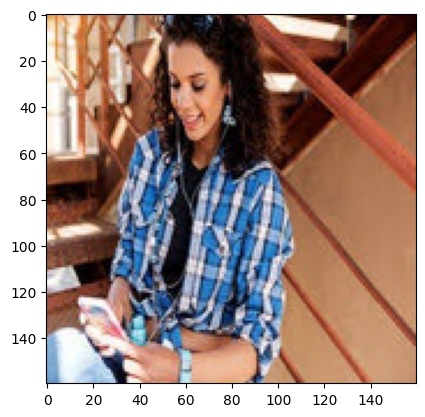

In [10]:
img_data = []
img_label = []
length = len(train_path)
for i in (range(len(train_path)-1)):
    t = '/content/drive/MyDrive/humanactionreco/train/' + filename[i]
    
    temp_img = Image.open(t)

    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])
    # if i==10:
    #     break


print(img_label[0])
print(img_data[0].shape)
plt.imshow(img_data[0])
plt.show

In [12]:
print(len(img_data), len(img_label))

12600 12600


In [13]:
inp_shape = (160, 160,3)

In [14]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [15]:
y_train = to_categorical(np.asarray(train_label['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')                  #resnet er model use korsi 
                                                        #with imagenet er upor kora weight e
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [17]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
resnet_model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24,644,495
Trainable params: 1,056,783
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
history = resnet_model.fit(iii,y_train, epochs=10)

Epoch 1/10
394/394 [==============================] - 35s 54ms/step - loss: 1.5505 - accuracy: 0.5056
Epoch 2/10
394/394 [==============================] - 22s 55ms/step - loss: 1.1374 - accuracy: 0.6249
Epoch 3/10
394/394 [==============================] - 21s 54ms/step - loss: 0.9641 - accuracy: 0.6811
Epoch 4/10
394/394 [==============================] - 22s 56ms/step - loss: 0.8221 - accuracy: 0.7217
Epoch 5/10
394/394 [==============================] - 22s 56ms/step - loss: 0.6620 - accuracy: 0.7731
Epoch 6/10
394/394 [==============================] - 22s 56ms/step - loss: 0.5332 - accuracy: 0.8237
Epoch 7/10
394/394 [==============================] - 22s 56ms/step - loss: 0.4180 - accuracy: 0.8625
Epoch 8/10
394/394 [==============================] - 22s 55ms/step - loss: 0.3074 - accuracy: 0.8973
Epoch 9/10
394/394 [==============================] - 22s 56ms/step - loss: 0.2282 - accuracy: 0.9294
Epoch 10/10
394/394 [==============================] - 22s 55ms/step - loss: 0.174

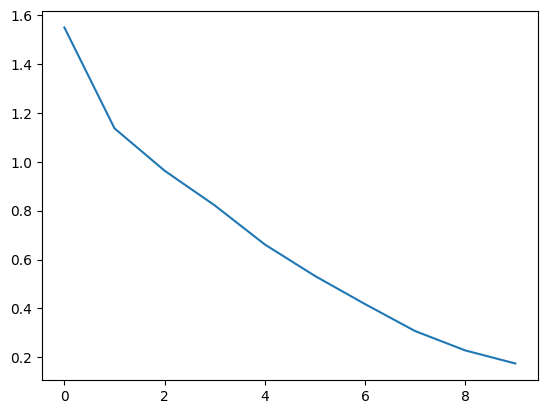

In [20]:
losss = history.history['loss']
plt.plot(losss)

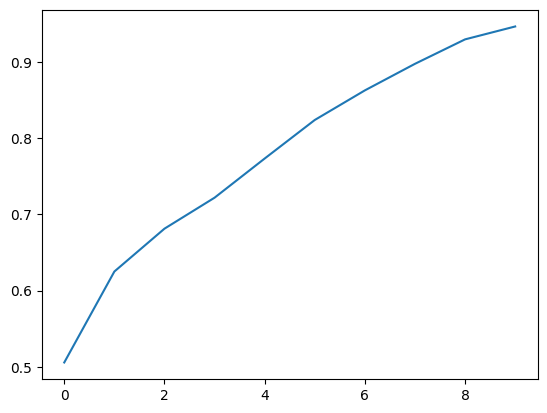

In [21]:
accu = history.history['accuracy']
plt.plot(accu)

In [39]:
#testing
# Function to read images as array

def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [47]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import cv2

In [49]:
# Function to predict
def test_predict(test_image):
    result = resnet_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = cv2.imread(test_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

1/1 [==============================] - 0s 28ms/step
probability: 45.5901175737381%
Predicted class :  0


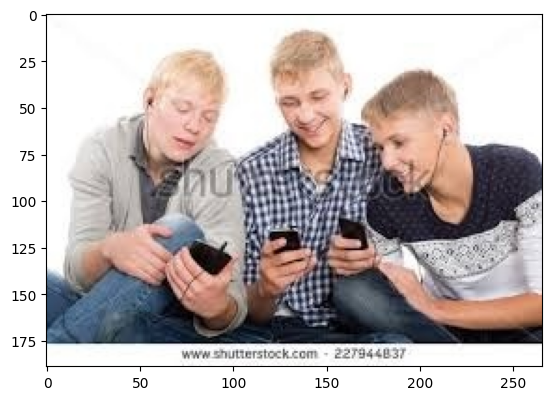

In [50]:
test_predict('/content/drive/MyDrive/humanactionreco/test/Image_1010.jpg')